In [1]:
!pip install -Uqq pandas --upgrade

In [2]:
import pandas as pd

In [3]:
!git clone https://github.com/pcsanwald/kaggle-titanic.git

Cloning into 'kaggle-titanic'...
remote: Enumerating objects: 19, done.
remote: Total 19 (delta 0), reused 0 (delta 0), pack-reused 19
Unpacking objects: 100% (19/19), done.


In [4]:
from fastai.basic_data import pathlib

In [5]:
path = pathlib.Path('kaggle-titanic')

In [6]:
path.ls()

[PosixPath('kaggle-titanic/README.md'),
 PosixPath('kaggle-titanic/test'),
 PosixPath('kaggle-titanic/.gitignore'),
 PosixPath('kaggle-titanic/train.csv'),
 PosixPath('kaggle-titanic/test.csv'),
 PosixPath('kaggle-titanic/doc'),
 PosixPath('kaggle-titanic/.git'),
 PosixPath('kaggle-titanic/project.clj'),
 PosixPath('kaggle-titanic/src')]

In [7]:
df = pd.read_csv(path/'train.csv')

Pandas functionalities

In [8]:
df.head(n=4)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [9]:
df.tail(n=3)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Selecting Rows

In [10]:
df.loc[:3] #loc is used to get rows (or columns) with a particular label from an index. 

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [11]:
df.iloc[:3]
# iloc is used when we want to get rows (or columns) from a position on an index

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


Selecting columns

In [12]:
df['survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [13]:
df[['sex', 'age', 'survived']].head()

,sex,age,survived
0,male,22.0,0
1,female,38.0,1
2,female,26.0,1
3,female,35.0,1
4,male,35.0,0


In [14]:
df.iloc[:,0]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [15]:
df.iloc[:, 0:3]

,survived,pclass,name
0,0,3,"Braund, Mr. Owen Harris"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,1,3,"Heikkinen, Miss. Laina"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,0,3,"Allen, Mr. William Henry"
...,...,...,...
886,0,2,"Montvila, Rev. Juozas"
887,1,1,"Graham, Miss. Margaret Edith"
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie"""
889,1,1,"Behr, Mr. Karl Howell"


In [16]:
df.loc[df['sex']=='female'].head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [17]:
df.loc[(df['sex']=='female') & (df['survived'] ==0)].head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
14,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
18,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S
24,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S
38,0,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,18.0000,NaN,S
40,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1,0,7546,9.4750,NaN,S


Plotting

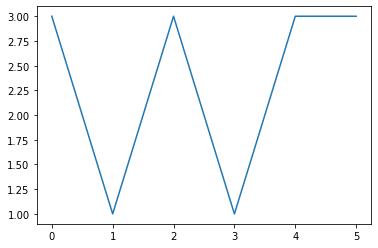

In [18]:
df['pclass'].iloc[:6].plot()

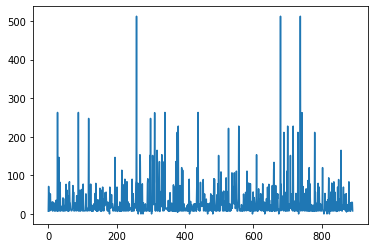

In [20]:
df['fare'].plot()

dealing with multiple dataframes

In [21]:
df1 = df[['sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'name']].iloc[:50]
df2 = df[df.columns[:6]].iloc[:50]

Merging operation

In [22]:
df1.head(), df2.head()

(   sibsp  parch  ... embarked                                               name
 0      1      0  ...        S                            Braund, Mr. Owen Harris
 1      1      0  ...        C  Cumings, Mrs. John Bradley (Florence Briggs Th...
 2      0      0  ...        S                             Heikkinen, Miss. Laina
 3      1      0  ...        S       Futrelle, Mrs. Jacques Heath (Lily May Peel)
 4      0      0  ...        S                           Allen, Mr. William Henry
 
 [5 rows x 7 columns],    survived  pclass  ...   age sibsp
 0         0       3  ...  22.0     1
 1         1       1  ...  38.0     1
 2         1       3  ...  26.0     0
 3         1       1  ...  35.0     1
 4         0       3  ...  35.0     0
 
 [5 rows x 6 columns])

In [23]:
merge = pd.merge(df1, df2, on='name')

In [24]:
merge.head()

,sibsp_x,parch,ticket,fare,cabin,embarked,name,survived,pclass,sex,age,sibsp_y
0,1,0,A/5 21171,7.2500,NaN,S,"Braund, Mr. Owen Harris",0,3,male,22.0,1
1,1,0,PC 17599,71.2833,C85,C,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,female,38.0,1
2,0,0,STON/O2. 3101282,7.9250,NaN,S,"Heikkinen, Miss. Laina",1,3,female,26.0,0
3,1,0,113803,53.1000,C123,S,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,female,35.0,1
4,0,0,373450,8.0500,NaN,S,"Allen, Mr. William Henry",0,3,male,35.0,0


Appending

In [25]:
df_top = df.iloc[:5]
df_bottom = df.iloc[5:10]

In [26]:
len(df_top), len(df_bottom)

(5, 5)

In [27]:
df_top.append(df_bottom)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Dropping

In [28]:
df_top.drop(0)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
df_top.drop('survived', axis=1)

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
df_top.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Groupby

In [31]:
surv = df.groupby('survived')

In [32]:
surv.first()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
survived,,,,,,,,,,
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,E46,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [34]:
surv.get_group(1)

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...
875,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [35]:
surs = df.groupby(['survived', 'sex'])

In [36]:
surs.first()

pclass  ... embarked
survived sex             ...         
0        female       3  ...        S
         male         3  ...        S
1        female       1  ...        C
         male         2  ...        S

[4 rows x 9 columns]

Map

In [37]:
type(df['survived'])

pandas.core.series.Series

In [38]:
df['survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [39]:
df['survived'].map({0:'dead', 1:'survived'}).head()

0        dead
1    survived
2    survived
3    survived
4        dead
Name: survived, dtype: object

In [40]:
df['survived'].map('I am a {}'.format).head()

0    I am a 0
1    I am a 1
2    I am a 1
3    I am a 1
4    I am a 0
Name: survived, dtype: object

Apply

In [41]:
def lived(num):
  if num == 0:
    return "Died"

  else:
    return "Lived"

In [42]:
new = df['survived'].apply(lived)

In [43]:
new.head()

0     Died
1    Lived
2    Lived
3    Lived
4     Died
Name: survived, dtype: object

In [44]:
new = df['age'].apply(lambda age: age+ 5)

In [46]:

print(f'{df["age"].head()}\n{new.head()}')

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: age, dtype: float64
0    27.0
1    43.0
2    31.0
3    40.0
4    40.0
Name: age, dtype: float64
